#PYTHON PROJECT

>**Introduction**

>A Python Project with matplotib on Supermarket sales.

> *Purpose of the Project:* To gain insights on consumer behavior, product performance, and overall profitability of the supermarket.
>  *Others:* Skill Development and Career Development.

> *language and Libraries used:* Python, Numpy, Pandas, Matplotib, Seaborn.

> *Dataset description:*
* Intances:1000
* Features:17 columns
* Numerical: 8 columns
* Categorical: 7 collumns
* Date-time: 2 columns
* memory usage: 132.9kb

> *Attribute Information:*
* Invoice Id: Computer generated sales slip invoice identification number.
* Branch: 3 supercenter branches are available,identified by A, B and C.
* City:Location of supercenter
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer.
* Product line: General item categorisation groups - Electronic accessories Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by the customer
* Tax:5% tax fee for customer buying
* Totat:Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10 am to 9 pm)
* Payment: Payment used by the customer for the purchase (3 methods are available Cash Credit card and wallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin porcentage
* Gross income: Gross Profit
* Rating: On a scale of 1 to 10 Customer satisfication rating on their overall shopping experience.


















In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df= pd.read_excel("Supermarket_Sales_Datafile.xlsx")
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

##1.Is your supermarket more popular with males or females?

In [ ]:
a= df.groupby(['Gender'])
a.size()

Gender
Female    501
Male      499
dtype: int64

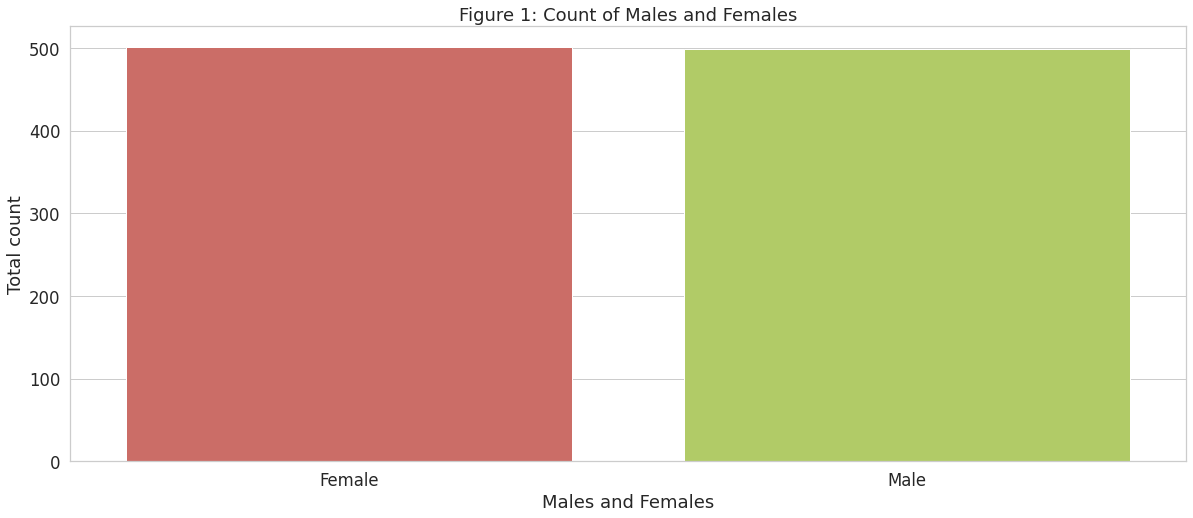

In [ ]:
# Adding title and labels for x and y axis
sns.countplot(x='Gender', data=df) # x axis is am column.
plt.title("Figure 1: Count of Males and Females")
plt.xlabel("Males and Females")
plt.ylabel("Total count")
plt.show()

\####Ans: Supermarket is slightly more popular with **Females**.

##2.What does the customer rating look like and can you also comment on its distribution?

Text(0.5, 1.0, 'Figure 2: Distribution of customer rating')

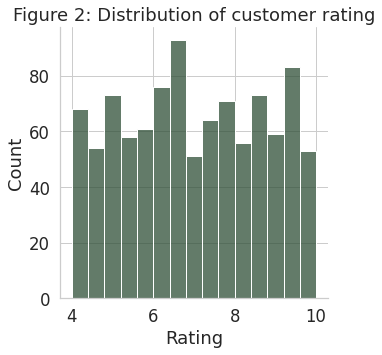

In [ ]:
sns.displot(df, x="Rating", bins=15, color='#2f4f37') #x axis as column
plt.title("Figure 2: Distribution of customer rating") #adding title

####Ans: On the scale of 0 to 100, Customers' ratings are above 50. No ratings are below 50. So, we can say Cutomers are satisfied, happy customers.

##3.What can you say about the aggregate sales across the branches?

In [ ]:
g = df.groupby(['Branch', "Total"])
g.size()

Branch  Total    
A       12.6945      1
        16.1070      1
        16.2750      1
        19.1940      1
        19.2465      1
                    ..
C       1003.5900    1
        1020.7050    1
        1023.7500    1
        1034.4600    1
        1042.6500    1
Length: 997, dtype: int64

Text(0.5, 1.0, 'Figure 3: aggregate sales across the branches')

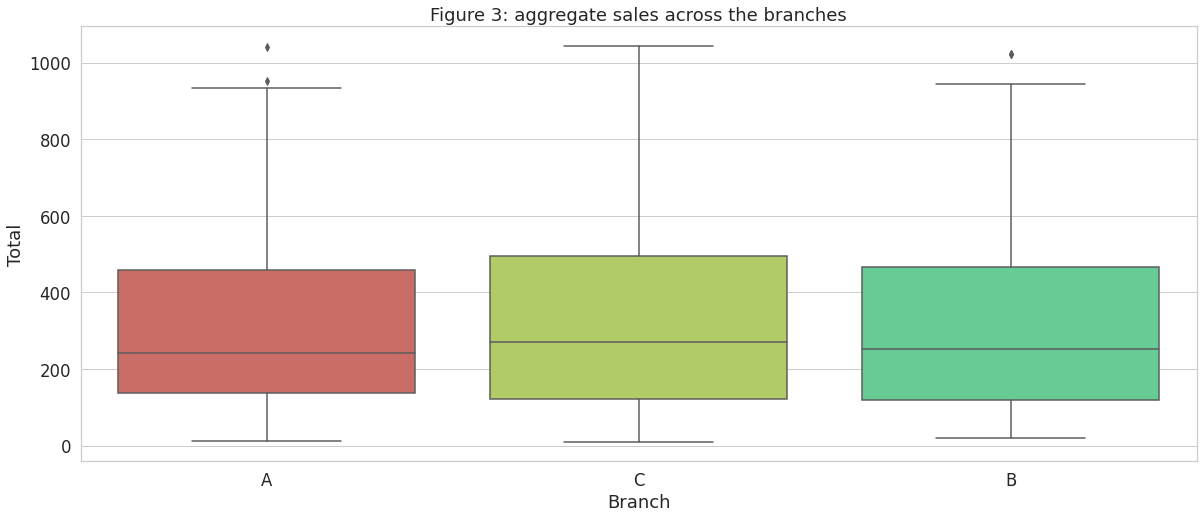

In [ ]:
sns.boxplot(x='Branch', y='Total', data=df) #x axis as column
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.5, style='whitegrid') #size setting
plt.title("Figure 3: aggregate sales across the branches") #adding title


####Ans: **Branch C** has the most sales.

##4.Which is the most popular payment method used by customers?

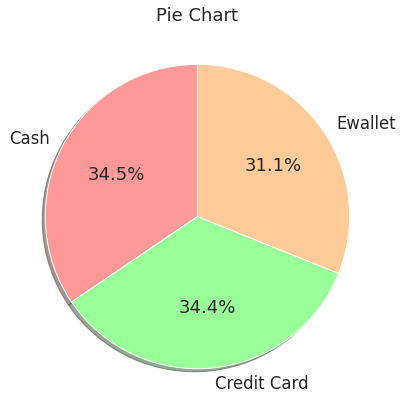

In [ ]:
count = df['Payment'].value_counts()
count
Payment = ['Cash', 'Credit Card', 'Ewallet'] #adding parameter
fig = plt.figure(figsize =(10, 7)) #adding size
colors=['#ff9999','#99ff99','#ffcc99']
plt.pie(count, labels =Payment , colors=colors,autopct='%1.1f%%',shadow=True, startangle=90) #plotiing pie chart
plt.title("Pie Chart") #adding title
plt.show()

####Ans: Most of the customer prefer **Cash** as method of payment

##5.Does gross income affect cutomer ratings?

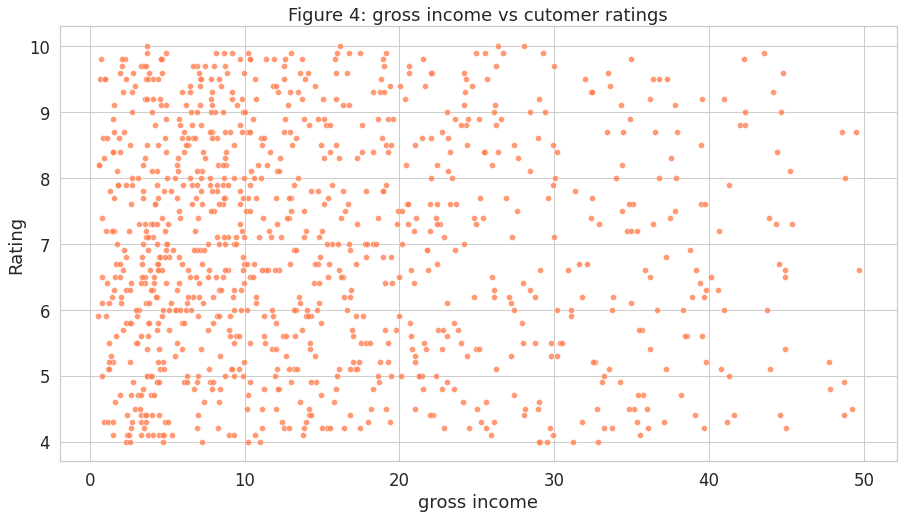

In [ ]:
sns.scatterplot(x = "gross income", y = "Rating", alpha=.8, data = df, color='coral') #x axis as columns
plt.gcf().set_size_inches((15, 8)) #setting size
plt.title("Figure 4: gross income vs customer ratings")# adding title
plt.show()

####Ans: When Income is more, ratings are less.

##6.Which is the most profitable branch?

Gross Profit =(Total-cogs), which is equal to 'gross income'.

In [ ]:
sns.boxplot(x='Branch', y='gross income', data=df) #x axis as column, y axis as row
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.5, style='darkgrid', palette="Set3")
plt.title("Figure 5: gross income vs branch ")# adding title

NameError: ignored

####Ans: **C branch** is most profitable branch.

##7.Create a boxplot between Gender and Gross income and explain the result?

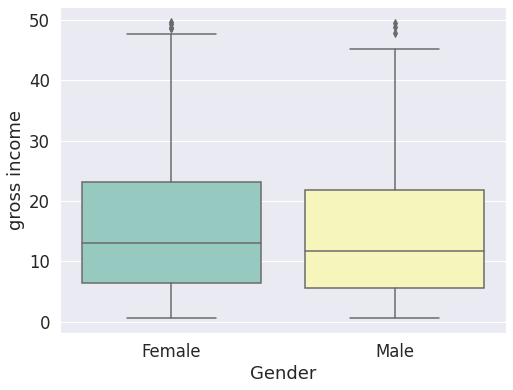

In [ ]:
sns.boxplot(x='Gender', y='gross income', data=df) #x axis as column, y axis as row
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.5, style='darkgrid') #setting size
plt.title("Figure 6: gross income over male female")

####Ans: In this boxplot we can see **Females** give more Income than Male.

##8.Can you see any time trend in gross income?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') #converting date to str type
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


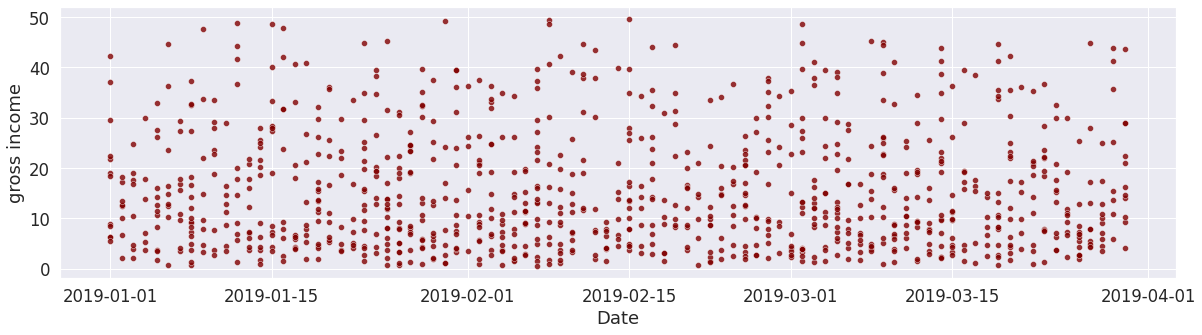

In [ ]:
sns.scatterplot(x = "Date", y = "gross income", alpha=.8, data = df, color='maroon')  #x axis as column, y axis as row
plt.gcf().set_size_inches((20, 5))#setting size
plt.title("Figure 6: gross income over male female")

####Ans: No, time trend in gross income. Income is always same throughout the month.

##9.What is the spending pattern of both males and females, meaning in which category do they spend more?

In [ ]:
df= pd.read_excel("Python_mandatory_project_supermarket_sales.xlsx", sheet_name=None)
df.keys()

dict_keys(['supermarket_sales', 'CITY Mapping', 'product Mapping'])

In [ ]:
df1=df['supermarket_sales']
df1.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
pm=df['product Mapping']
pm

,Product line,Product code
0,Health and beauty,PD1
1,Electronic accessories,PD2
2,Home and lifestyle,PD3
3,Sports and travel,PD4
4,Food and beverages,PD5
5,Fashion accessories,PD6


In [ ]:
cm=df['CITY Mapping']
cm

,City,CITY CODE
0,Yangon,CT1
1,Naypyitaw,CT3
2,Mandalay,CT9


In [ ]:
new_df=df1["Product code"].replace({"PD1":"Health and beauty", "PD2":"Electronic accessories", "PD3":"Home and lifestyle", "PD4":"Sports and travel", "PD5":"Food and beverages", "PD6":"Fashion accessories"}, inplace=True)


In [ ]:
new_df=df1['city code '].replace({"CT1":"Yangon", "CT3":"Naypyitaw", "CT9":"Mandalay"})

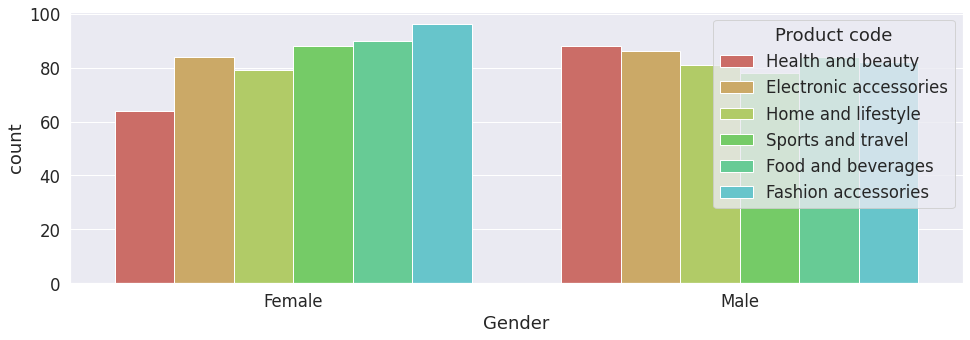

In [ ]:
plt.figure(figsize=(16,5))
sns.set_palette("hls", 10)
sns.countplot(x='Gender', hue='Product code', data=df1)
plt.title("Figure 7: Products over male female")
plt.show()

####Ans: Females spend on 'Food and beverages' and "Fashion and accesssories ' and Males spend on 'Health and beauty' and 'Electronics accessories' more.

##10.How many products are bought by customers?

In [ ]:
new_df= df1.groupby(['Product code'])
new_df.size()

Product code
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

In [ ]:
len(df1)

1000

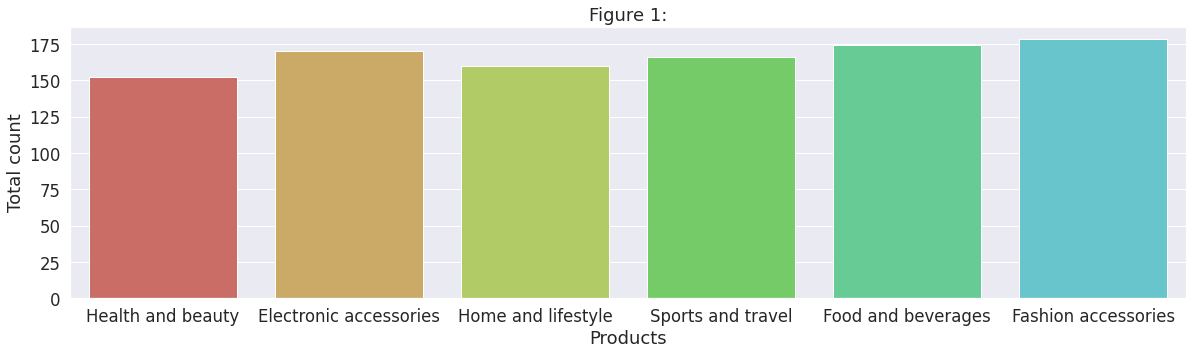

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Product code', data=df1) # x axis is am column.
plt.title("Figure 8:total count vs products")
plt.xlabel("Products")
plt.ylabel("Total count")
plt.show()

####Ans: Total 1000 products are bought by customers.

##11.Which day of the week has maximum sales?

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], errors = 'coerce')

In [ ]:
df1['Weekday'] = df1[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday
0,750-67-8428,A,CT1,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,CT3,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,CT1,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,CT1,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,CT1,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


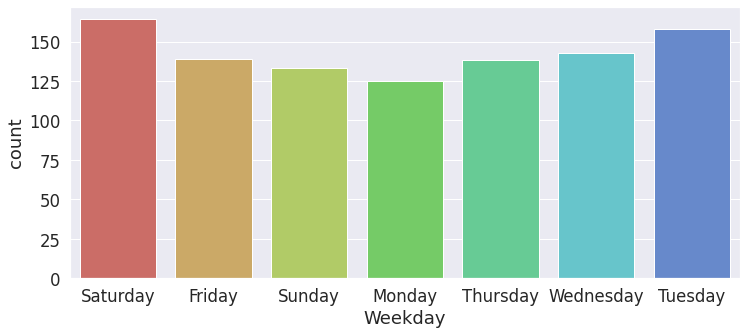

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Weekday', data=df1) # x axis is am column.
plt.title("Figure 9:count over weekdays")
plt.show()

####Ans: **Saturday** has the maximum sales.

##12.Which hour of the day is busiest?

In [ ]:
df1['time_hour'] = df1.Time.apply(lambda x: x.hour)
df1.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,time_hour
0,750-67-8428,A,CT1,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,226-31-3081,C,CT3,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,631-41-3108,A,CT1,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,123-19-1176,A,CT1,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,373-73-7910,A,CT1,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10


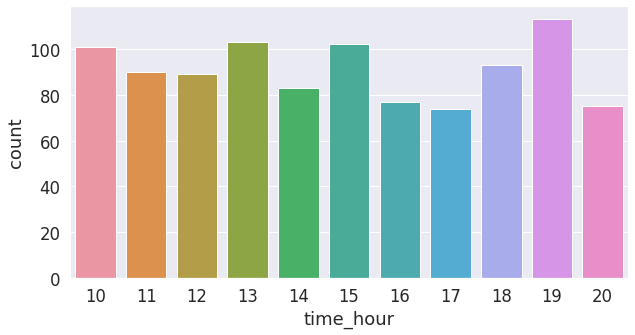

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='time_hour', data=df1) # x axis is am column.
plt.title("Figure 10: time_hour distribution")
plt.show()

####Ans: **7pm** is the busiest hour of the day.

##13.Which product line should your supermarket focus on?

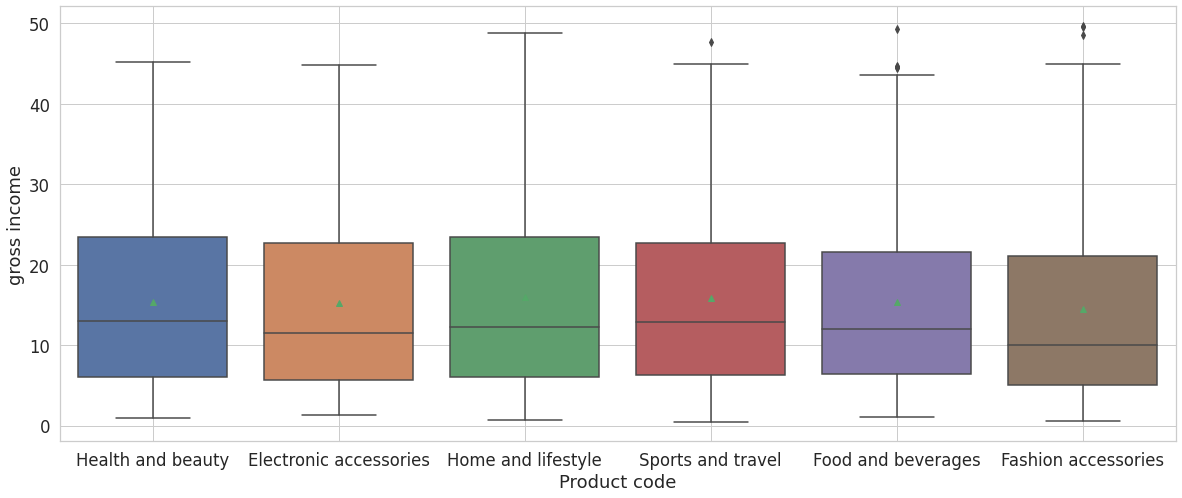

In [ ]:
sns.boxplot(x='Product code', y='gross income', data=df1, showmeans=True)
sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')
plt.title("Figure 6: gross income over products")
plt.grid(True)



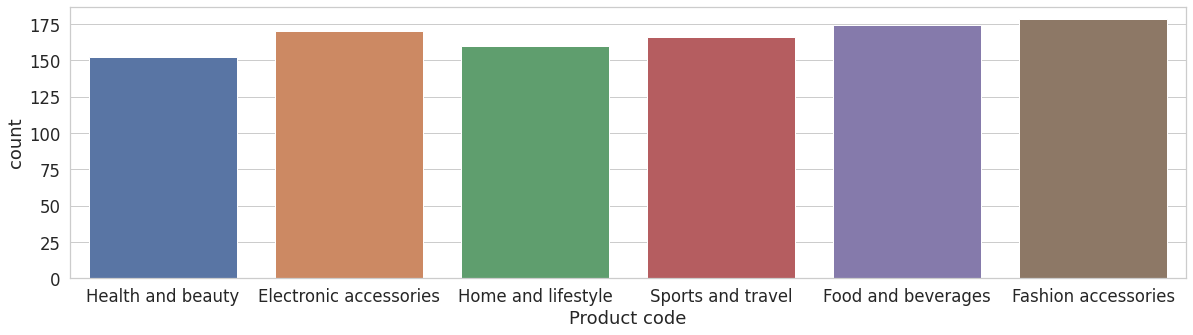

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Product code', data=df1) # x axis is am column.
plt.title("Figure 6: products distribution")
plt.show()

####Ans:'Fashion accessories' has more sales on the other hand 'Home and lifestyle' has more profit .But as'Fashion accessories' has slightly more sales than others and 'Home and lifestyle' has little more profit compare to. so, the product should be focused on is **'Home and lifestyle'**


##14.Which city should be chosen for expansion and what products should be focused on?

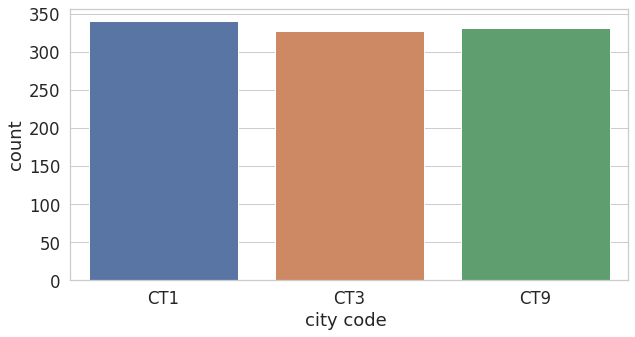

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='city code ', data=df1) # x axis is am column.
plt.title("Figure 6: gross incomme over cities")
plt.show()

####Ans: CT3 has less sales compared to other cities, CT3,i.e., **Naypyitaw** should be chosen for expansion:

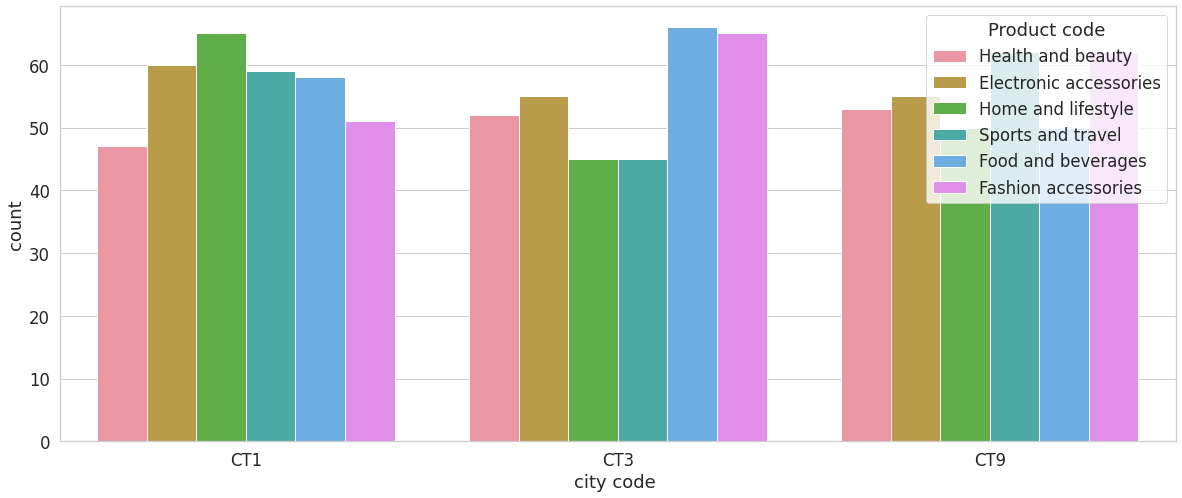

In [ ]:
sns.set_palette("hls", 5)
sns.countplot(x='city code ', hue='Product code', data=df1)
plt.title("Figure 6: products over male cities")
plt.show()

####Ans: '**Home and lifestyle**' and '**Sports and travel**' products should be focused on for CT3(Naypyitaw).